In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

##### Veri Kaggle'dan alınmıştır: https://www.kaggle.com/datasets/thedevastator/bank-term-deposit-predictions?resource=download

In [2]:
base_url = "C:/Users/M E L S A/Desktop/M E L S A/data_science/datasciencetemp/data/bank/"
train_url = base_url + "train.csv"
test_url = base_url + "test.csv"

In [3]:
train_df = pd.read_csv(train_url)

In [4]:
test_df = pd.read_csv(test_url)

###### age : Müşterinin yaşı 	
###### job : Müşterinin işi
###### marital :	Müşterinin medeni durumu (married, single, divorced)
###### education : Müşterinin eğitim düzeyi
###### default :	Müşterinin temerrüde düşmüş kredisi olup olmadığı
###### balance :	Müşterinin hesabındaki bakiye
###### housing loan : Müşterinin konut kredisi olup olmadığı	
###### contact :	Müşteriyle iletişim kurmak için kullanılan yöntem (örn. telefon, cep telefonu)
###### day :	Müşterilerle en son iletişime geçilen ayın günü
###### month	: Müşterilerle en son iletişime geçilen ay
###### duration : Kampanya süresince müşterilerle son temasın süresi (saniye cinsinden)	
###### campaign : Her müşteri için bu kampanya sırasında gerçekleştirilen iletişim sayısı
###### poutcome : önceki pazarlama kampanyasının sonucu

In [5]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,unknown


In [6]:
marital = train_df.iloc[:,2:3].values #integer location (iloc) : 2 ile 3 arasında kalan kolondaki tüm satırları al demek
print(marital)

[['married']
 ['single']
 ['married']
 ...
 ['married']
 ['married']
 ['married']]


In [12]:
from sklearn import preprocessing #from sklearn.preprocessing import LabelEncoder yazarsan da olur.
#LabelEncoder her bir medeni hal için sayısal değer karşılığı koyan bir encoderdır.
le = preprocessing.LabelEncoder() #secili her bir variable için bir sayisal deger gonderen LabelEncoder objesi oluşturuldu.
marital[:,0] = le.fit_transform(train_df.iloc[:,2:3]) #medeni halin belirli konumlarda (0.kolon) hem uygular(fit) hem de sonucu yazar (transform).
print(marital)

[[1]
 [2]
 [1]
 ...
 [1]
 [1]
 [1]]


In [13]:
#from sklearn.preprocessing import OneHotEncoder eger 12. satir diyez önündeki olsaydı bunu eklemek mecburiyetindeydik.
ohe = preprocessing.OneHotEncoder() #medeni hali en üst satıra alır ve medeni halin değerine göre 1 koyar geriye kalan durumlara 0 değerini koyar.
marital = ohe.fit_transform(marital).toarray()
print(marital)

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  poutcome   45211 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [8]:
train_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
poutcome     0
dtype: int64

In [9]:
test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,unknown


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  poutcome   4521 non-null   object
dtypes: int64(5), object(9)
memory usage: 494.6+ KB


In [11]:
test_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
poutcome     0
dtype: int64

In [5]:
tr_df = train_df[['age', 'balance', 'day', 'duration', 'campaign']]

In [6]:
ts_df = test_df[['age', 'balance', 'day', 'duration', 'campaign']]

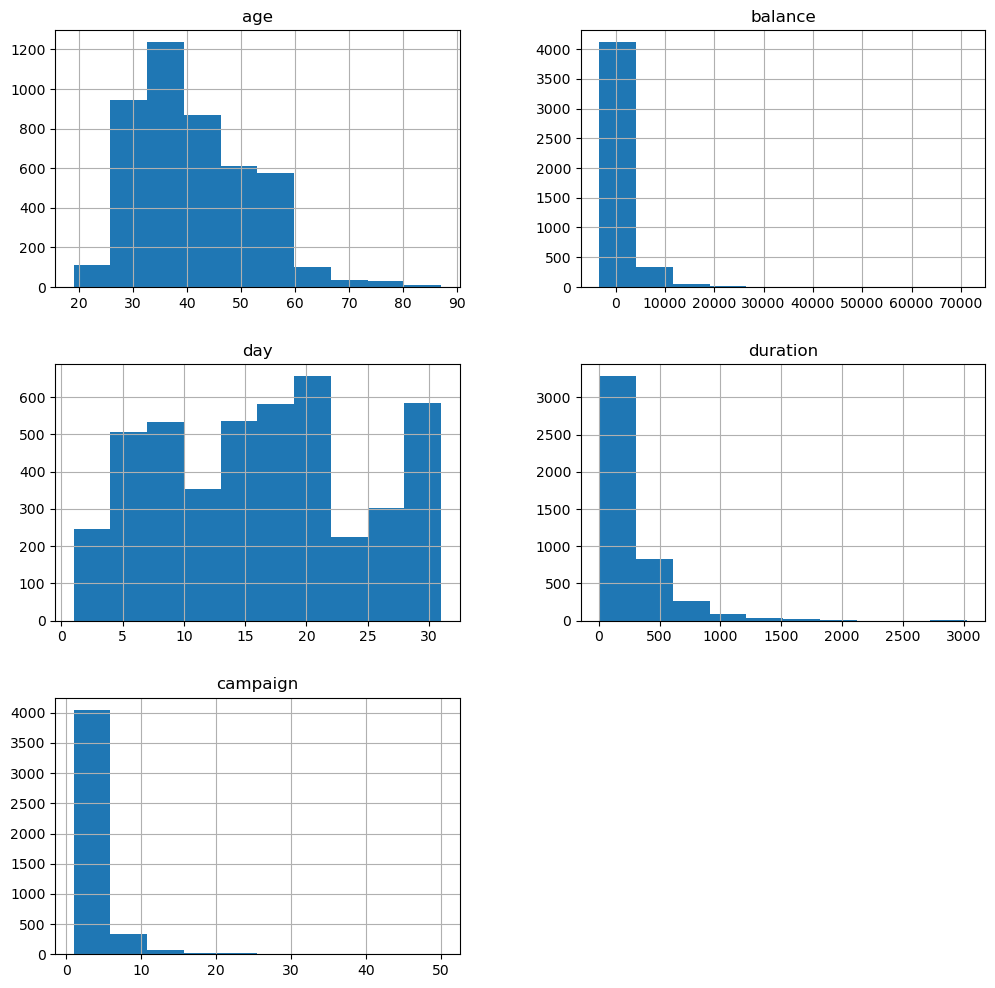

In [11]:
plt.rcParams['figure.figsize'] = (12,12)
viz = ts_df[['age', 'balance', 'day', 'duration', 'campaign']]
viz.hist()
plt.show()

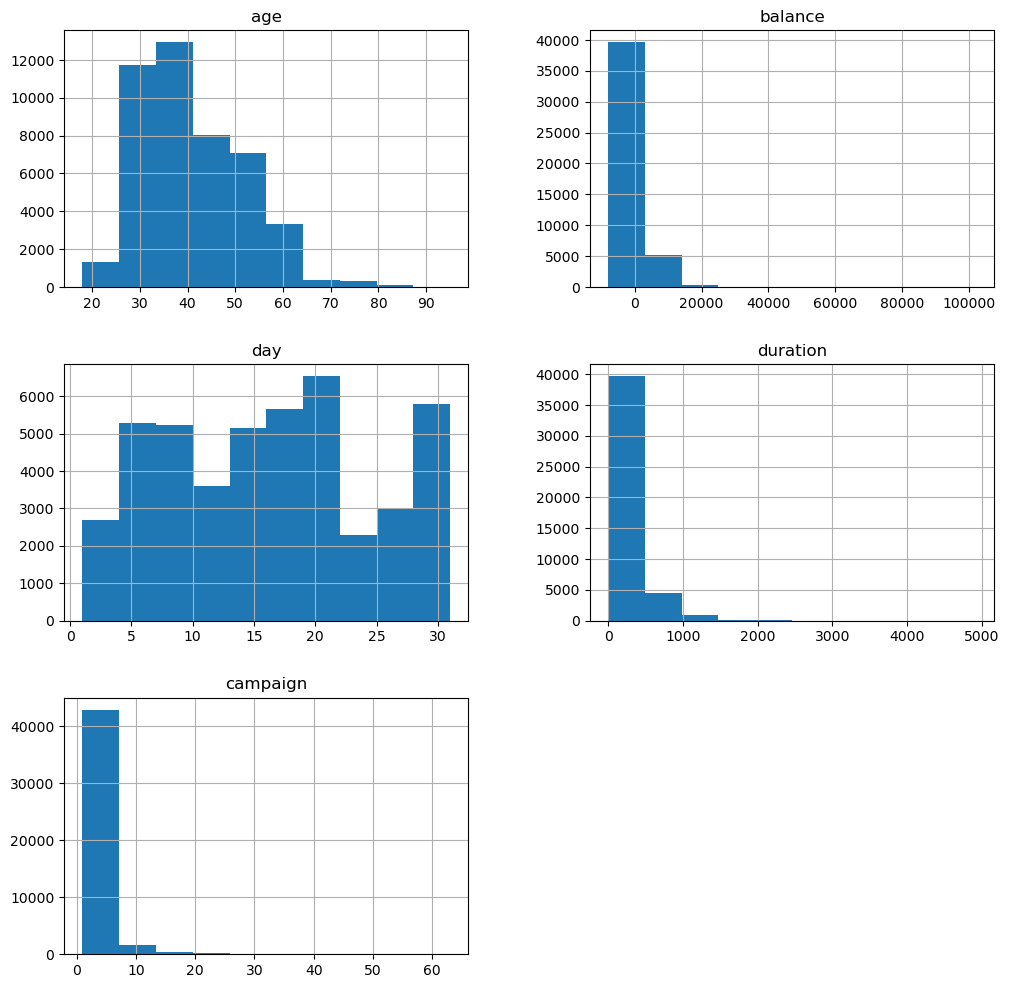

In [8]:
plt.rcParams['figure.figsize'] = (12,12)
viz = tr_df[['age', 'balance', 'day', 'duration', 'campaign']]
viz.hist()
plt.show()

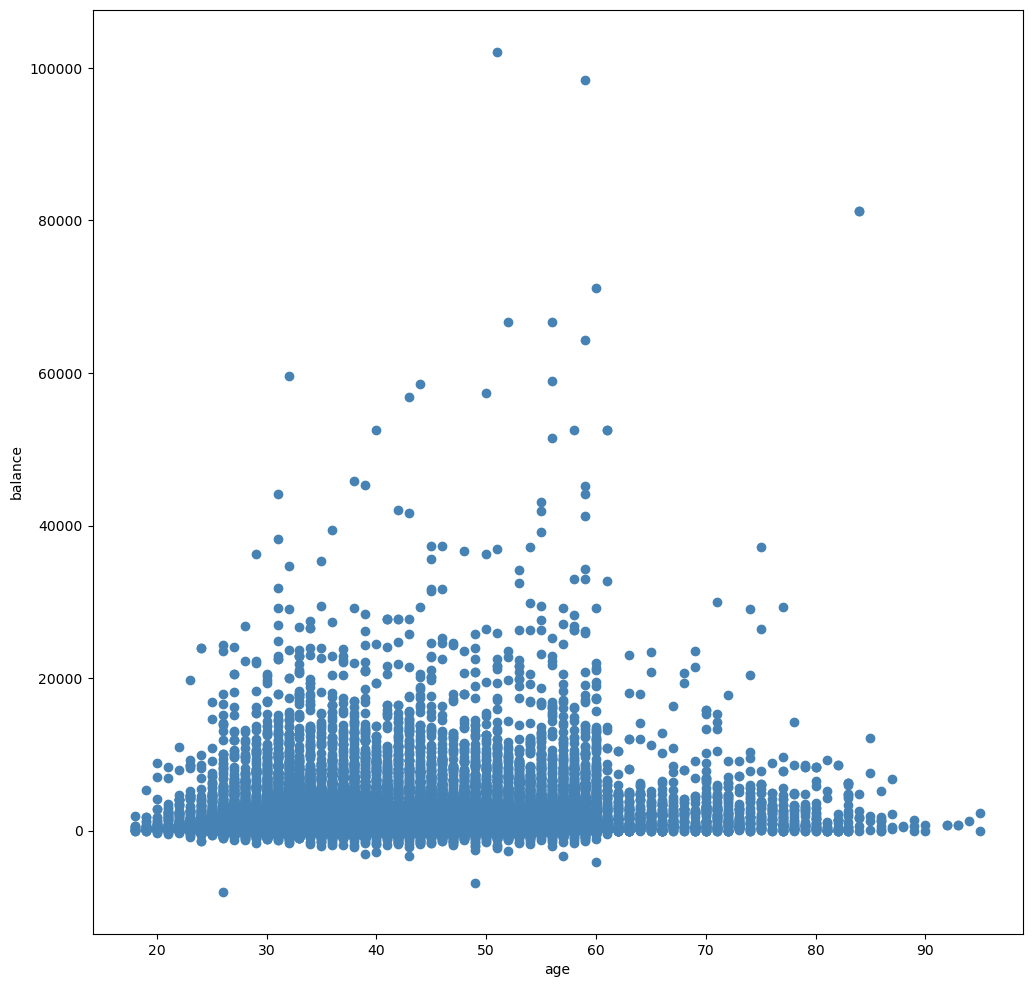

In [53]:
plt.scatter(tr_df.age, tr_df.balance, color="steelblue")
plt.xlabel("age")
plt.ylabel("balance")
plt.show()

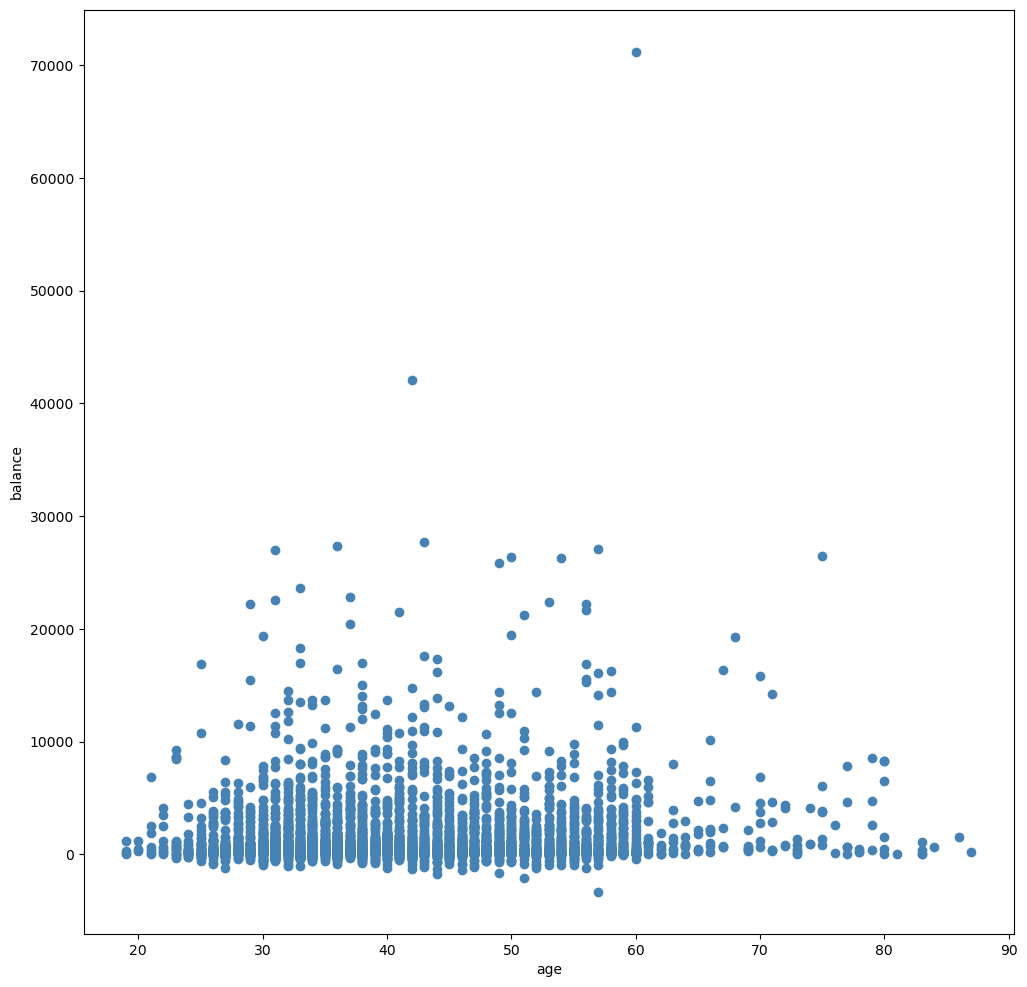

In [56]:
plt.scatter(ts_df.age, ts_df.balance, color="steelblue")
plt.xlabel("age")
plt.ylabel("balance")
plt.show()

In [18]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(tr_df[['age']])
train_y = np.asanyarray(tr_df[['balance']])

regr.fit(train_x, train_y)

LinearRegression()

In [19]:
print(regr.coef_)
print(regr.intercept_)

[[28.03768861]]
[214.51534285]


In [20]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(ts_df[['age']])
test_y = np.asanyarray(ts_df[['balance']])
test_y_ = regr.predict(test_x)

In [21]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 1598.89
Residual sum of squares (MSE): 8997149.37
R2-score: 0.01


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [23]:
# İlgili özellikler seçilir
features = ['age', 'day', 'duration', 'campaign']

In [24]:
mdf = pd.concat([tr_df, ts_df], ignore_index=True)

In [25]:
# Bağımlı ve bağımsız değişkenler tanımlanır
X = mdf[features]
y = mdf['balance']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [28]:
# Model oluşturulur ve eğitilir
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
# Tahmin yaptırılır
y_pred = model.predict(X_test)

In [30]:
# Model performansı değerlendirilir
print('Ortalama Mutlak Hata (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Ortalama Kare Hata (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Kök Ortalama Kare Hata (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % model.score(X, y)) # explained variance, best score is 1.0

Ortalama Mutlak Hata (MAE): 1.887325385009334e-12
Ortalama Kare Hata (MSE): 1.553771910784109e-23
Kök Ortalama Kare Hata (RMSE): 3.941791357725709e-12
Variance score: 1.00


In [31]:
# Katsayılar ve sabit (intercept) değerlere bakılır
coefficients = pd.DataFrame({'Katsayılar': model.coef_}, index=features)
intercept = model.intercept_
print('\nKatsayılar:\n', coefficients)
print('\nSabit (Intercept):', intercept)


Katsayılar:
             Katsayılar
age       1.173559e-14
balance   1.000000e+00
day      -1.475043e-15
duration -1.968257e-17
campaign -8.152030e-16

Sabit (Intercept): 1.1368683772161603e-12
